In [70]:
import requests
from bs4 import BeautifulSoup

gasgrow_lst=[]
evgrow_lst=[]
tslagrow_lst=[]

month_lst=[]

def main():
    url_gas = 'https://stat.thb.gov.tw/hb01/webMain.aspx?sys=220&ym=10811&ymt=10911&kind=21&type=1&funid=1120009&cycle=1&outmode=0&compmode=1&outkind=1&fld9=1&cod00=1&cod11=1&rdm=R179112'
    resp_gas = requests.get(url_gas)
    soup_gas = BeautifulSoup(resp_gas.text, 'html.parser')
    resp_gas.encoding = 'utf-8'
    
    url_ev = 'https://stat.thb.gov.tw/hb01/webMain.aspx?sys=220&ym=10811&ymt=10911&kind=21&type=1&funid=1120009&cycle=1&outmode=0&compmode=1&outkind=1&fld9=1&cod00=1&cod13=1&rdm=R151567'
    resp_ev = requests.get(url_ev)
    soup_ev = BeautifulSoup(resp_ev.text, 'html.parser')
    resp_ev.encoding = 'uft-8'
    
    url_tsla = 'https://stat.thb.gov.tw/hb01/webMain.aspx?sys=220&ym=10811&ymt=10911&kind=21&type=1&funid=1120009&cycle=1&outmode=0&compmode=1&outkind=1&fld9=1&cod051=1&rdm=R102891'
    resp_tsla = requests.get(url_tsla)
    soup_tsla = BeautifulSoup(resp_tsla.text, 'html.parser')
    resp_tsla.encoding = 'uft-8'
    
    
    #table_gas=soup_gas.find('table','tblcls')
    #table_ev=soup_ev.fing('table','tblcls')
    #table_tsla=soup_tsla.fing('table','tblcls')
    
    #trs_gas = table_gas.find('tr')
    #trs_ev = table_ev.find('tr')
    #trs_tsla = table_tsla.find('tr')
    
    gas_data = soup_gas.find_all('td', class_='styrate stydata')
    ev_data = soup_ev.find_all('td',class_='styrate stydata')
    tsla_data = soup_tsla.find_all('td',class_='styrate stydata')
    month_data = soup_gas.find_all('th', class_='stycode')
    
    for gas in gas_data:
        gasgrow_lst.append(float(gas.text.replace(',','')))     
        print(gas.text)
    print("--------End Gas--------")
    
    for ev in ev_data:
        evgrow_lst.append(float(ev.text.replace(',','')))
        print(ev.text)
    print("--------End EV--------")
    
    for tsla in tsla_data:
        tslagrow_lst.append(float(tsla.text.replace(',','')))
        print(tsla.text)
    print("--------End TSLA--------")
    
    for month in month_data:
        month_lst.append(month.text)
        print(month.text)
    
    
if __name__ == '__main__':
    main()


    -0.15 
    13.85 
   -11.58 
   -35.47 
    32.24 
   -13.93 
    12.56 
    21.89 
     8.55 
   -25.88 
     6.23 
    10.02 
    16.49 
--------End Gas--------
   268.00 
   153.70 
   -89.03 
   -13.28 
 1,286.49 
   -92.53 
   -19.13 
   289.25 
   -87.29 
 1,723.91 
    37.90 
   -96.89 
 1,241.67 
--------End EV--------
   522.06 
   160.99 
   -89.86 
   -23.21 
 1,655.81 
   -93.97 
   -25.27 
   401.47 
   -94.13 
 3,915.00 
    33.25 
   -98.22 
 2,247.37 
--------End TSLA--------
108年 11月
108年 12月
109年 1月
109年 2月
109年 3月
109年 4月
109年 5月
109年 6月
109年 7月
109年 8月
109年 9月
109年 10月
109年 11月


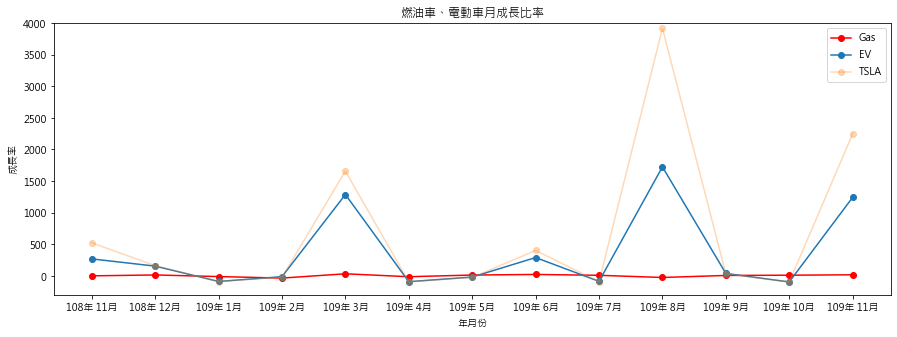

In [99]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties


plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] #設定字體
plt.rcParams['axes.unicode_minus'] = False 
plt.figure(figsize = (15,5)) #調整大小，避免x軸字重疊
plt.title("燃油車、電動車月成長比率")  #標題
plt.xlabel("年月份")     #x軸名稱
plt.ylabel("成長率")  #y軸名稱
plt.ylim(-300,4000)   


gas,=plt.plot(month_lst, gasgrow_lst,'o-',c = "r",)
ev,=plt.plot(month_lst, evgrow_lst,'o-')
tsla,=plt.plot(month_lst,tslagrow_lst,'o-',alpha=0.3)

plt.legend(handles=[gas,ev,tsla],labels=['Gas','EV','TSLA'],loc='best')
plt.show()